In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qick import QickConfig
import sys 
from scresonators.fit_resonator.ana_resonator import ResonatorFitter
from scresonators.fit_resonator.ana_resonator import ResonatorData
#sys.path.append('C:\\_Lib\\python\\qq\\slac_qick_calib')
sys.path.append('C:\\_Lib\\python\\qq\\')

import slab_qick_calib.config as config
from slab_qick_calib.exp_handling.instrumentmanager import InstrumentManager
import slab_qick_calib.experiments as meas

%load_ext autoreload
%autoreload 2

# Configuration
ip = '10.108.30.23'

expt_path = 'C:\\_Data\\Terracat\\2025-04-28\\'
cfg_file='Terracat2.yml'

# Set seaborn color palette
colors = ["#0869c8", "#b51d14", '#ddb310', '#658b38', '#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

# Figure parameters
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 13})

print('Data will be stored in', expt_path)

# Results config file
cfg_path = os.path.join(os.getcwd(), 'configs', cfg_file)
auto_cfg = config.load(cfg_path)

# Connect to instruments
im = InstrumentManager(ns_address=ip)
print(im)
soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)

cfg_dict = {'soc': soc, 'expt_path': expt_path, 'cfg_file': cfg_path, 'im': im}


QICK library version mismatch: 0.2.316 remote (the board), 0.2.325 local (the PC)
                        This may cause errors, usually KeyError in QickConfig initialization.
                        If this happens, you must bring your versions in sync.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Data will be stored in C:\_Data\Terracat\2025-04-28\
{'Pyro.NameServer': <Pyro4.core.Proxy at 0x2938617fe30; not connected; for PYRO:Pyro.NameServer@10.108.30.23:9090>, 'bf1_soc': <Pyro4.core.Proxy at 0x29386773a40; not connected; for PYRO:obj_f3926536dc244995866e6a1a1927b51b@10.108.30.74:41833>}
QICK running on ZCU216, software version 0.2.316

Firmware configuration (built Sat Sep 28 22:15:40 2024):

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	16 signal generator channels:
	0:	axis_signal_gen_v6 - envelope memory 65536 samples (6.838 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 0, blk 0 is 0_228, on JHC1
	1:	axis_signal_gen_v6 - envelope memory 16384 samples (1.709 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 0, blk 1 is 1_228, on JHC2
	2:	axis_signal_gen_v6 - envelope memory 32768 samples (3.419 u

In [10]:
import os
import slab_qick_calib.config as config
new_config = True
new_folder = True
expt_path = 'C:\\_Data\\Terracat\\'
cfg_file='Terracat2.yml'

if new_config or new_folder:
    if not os.path.exists(os.getcwd() + '\\configs\\'):
        os.makedirs( os.getcwd() + '\\configs\\')
    if new_config:
        config.init_config_res( os.getcwd() + '\\configs\\' + cfg_file, 8, type='full', aliases='bf1_soc')

    if not os.path.exists(expt_path):
        os.makedirs(expt_path)

  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\Terracat\2025-04-28\adc_trig_offset_calibration_qubit0_00004.h5


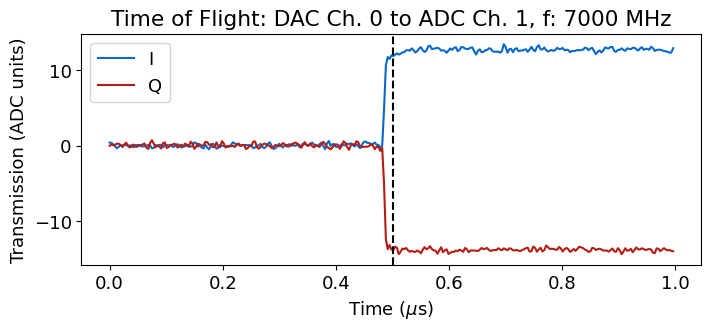

In [15]:
qubit_list = [0]
for qi in qubit_list:  
        tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi, params={'frequency':7000})
        #tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13})#,params={'frequency':fi})
        # use this to set trig_offset in config file

# Coarse

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


  0%|          | 0/10000 [00:00<?, ?it/s]

Number of peaks: 0


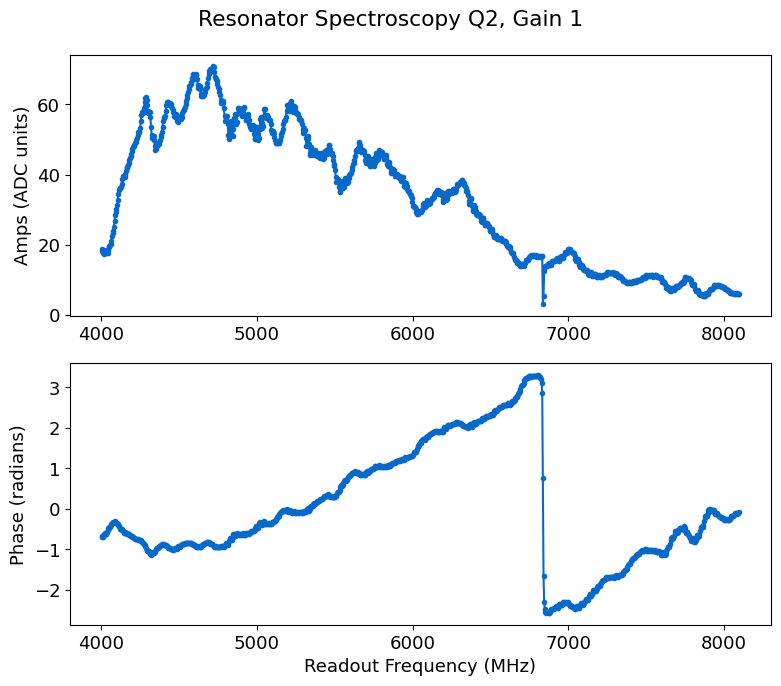

In [ ]:
rspecc = meas.ResSpec(cfg_dict, qi=qi, style='coarse', params={'start':4000, 'span':4100, 'soft_avgs':1, 'reps':10, 'gain':1, 'expts':1000,'length':500})

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


  0%|          | 0/1000000 [00:00<?, ?it/s]

Number of peaks: 0


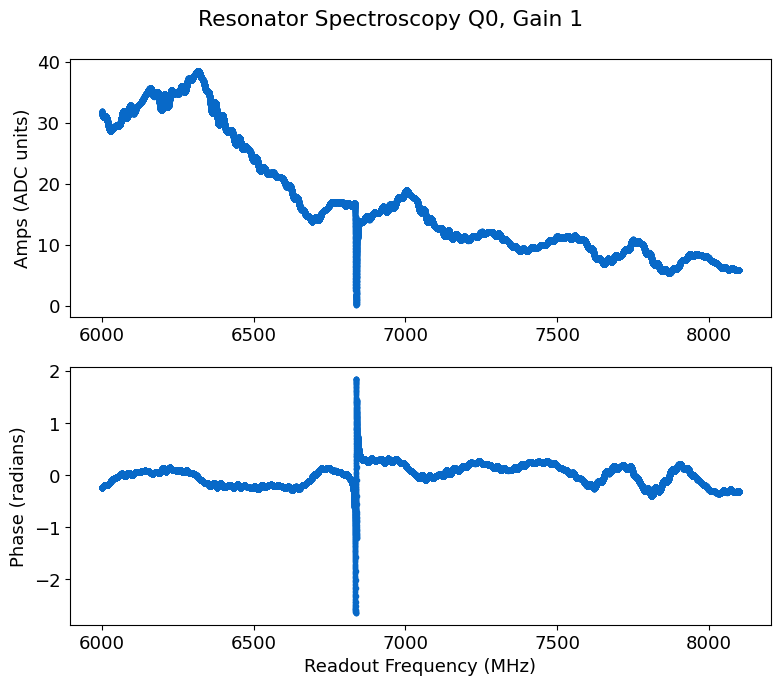

In [39]:
#rspec = cfg.make_rspec_coarse(soc, expt_path, cfg_path, i, im=im, start=6000, span=800, reps=2000, npts=5000)
qi=0
rspecc = meas.ResSpec(cfg_dict, qi=qi, style='coarse', params={'start':6000, 'span':2100, 'soft_avgs':1, 'reps':10, 'gain':1, 'expts':100000,'length':1000})
res_values = rspecc.data['coarse_peaks']


Number of peaks: 1


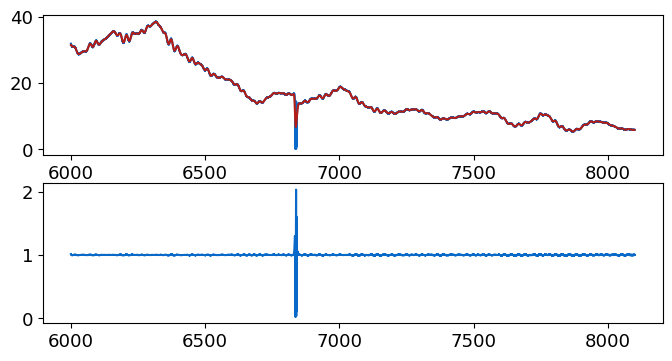

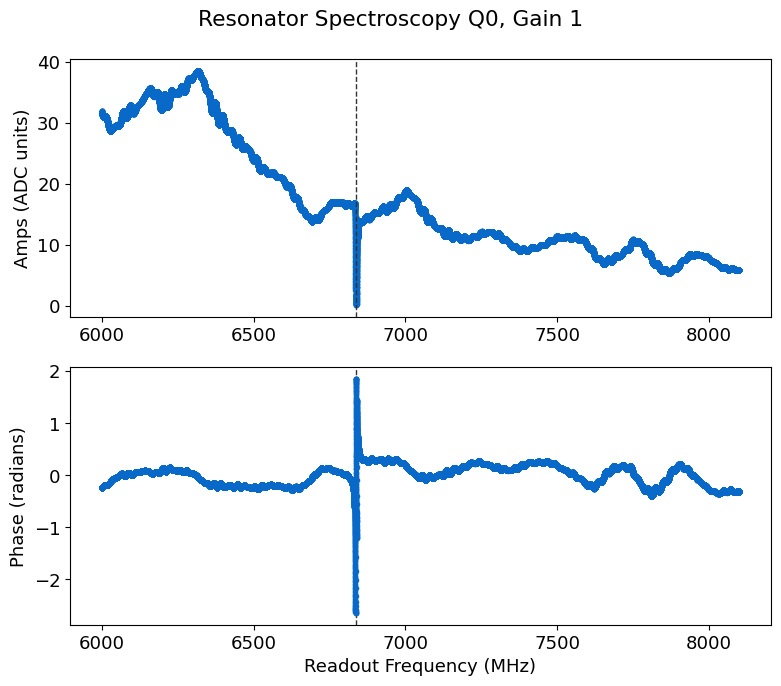

In [40]:
rspecc.analyze(peaks=True, debug=True, fit=False, prom=0.05)
rspecc.display(peaks=True, fit=False)
res_values = rspecc.data['coarse_peaks']

In [ ]:
res_values = np.delete(res_values,1)

# Res fine

  0%|          | 0/11000 [00:00<?, ?it/s]

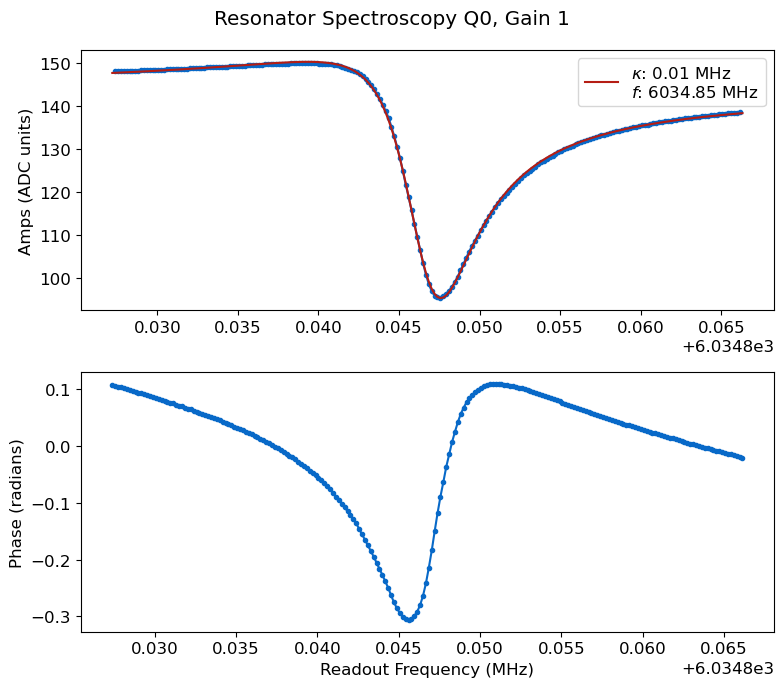

*Set cfg readout 0 frequency to 6034.8476 from 6034.8475*
*Set cfg readout 0 kappa to 0.0058 from 0.0058*
*Set cfg readout 0 qi to 168.1984 from 166.2766*
*Set cfg readout 0 qe to 271.3605 from 272.2778*


In [88]:
update=True

qubit_list = np.arange(8)
qubit_list=[0]
for qi in qubit_list:    
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':0.1, 'center':res_values[qi], 'gain':1,'reps':4,'length':500}) # Use this to sweep through the res_values list
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','reps':50,'gain':1,'length':500})
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':0.1,'long_pulse':True,'gain':1,'length':500})
    if update: rspec.update(cfg_dict['cfg_file'])


In [ ]:
plt.figure()

fix_phase = np.unwrap(rspec.data['phases']-rspec.data['phases'][0])-fit_params[0]*rspec.data['xpts']
amps = rspec.data['amps']
x = amps*np.cos(fix_phase)
y = amps*np.sin(fix_phase)
plt.plot(x, y, 'o', label='raw data')


## Power sweep

In [ ]:
qi=4
qi_list=[]
gains = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
#gains = [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
d=[]
for i, g in enumerate(gains):
    reps = int(np.ceil(4*(2)**i))
    print(reps)
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','long_pulse':True,'reps':reps,'gain':g,'expts':100})
    rspec.update(cfg_dict['cfg_file'])
    d.append(rspec.data['amps'])
    qi_list.append(rspec.data['fit'][1])

plt.figure()
plt.plot(qi_list,'-o')
plt.title(f'Resonator {qi}')
plt.figure()

for i, dd in enumerate(d): 
    plt.semilogy(dd*2**i)
plt.figure()
plt.semilogy(np.array(qi_list[1:-1])*10/1000,'-o')
plt.title(f'Resonator {qi}')

In [ ]:
qi=4
qi_list=[]
final_delay = [1,5,10,20,50,100,200,500,1000,2000]
d=[]
for i, g in enumerate(gains):
    reps = int(np.ceil(4*(2)**i))
    print(reps)
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','long_pulse':True,'reps':reps,'gain':g,'expts':100})
    rspec.update(cfg_dict['cfg_file'])
    d.append(rspec.data['amps'])
    qi_list.append(rspec.data['fit'][1])

plt.figure()
plt.plot(qi_list,'-o')
plt.title(f'Resonator {qi}')
plt.figure()

for i, dd in enumerate(d): 
    plt.semilogy(dd*2**i)
plt.figure()
plt.semilogy(np.array(qi_list[1:-1])*10/1000,'-o')
plt.title(f'Resonator {qi}')

In [ ]:
import copy

cfg = config.load(cfg_path)
rspec.data['freqs']=rspec.data['xpts']*1e6

fix_phase = rspec.data['phases']-cfg['device']['readout']['phase_inc']*rspec.data['xpts']
data = copy.deepcopy(rspec.data)
data['phases']= np.unwrap(fix_phase)-np.unwrap(fix_phase)[0]
data = ResonatorData.fit_phase(data)
data['amps']=20*np.log10(data['amps'])
output = ResonatorFitter.fit_resonator(data, 'hi', os.getcwd(), plot=True, fix_freq=False)

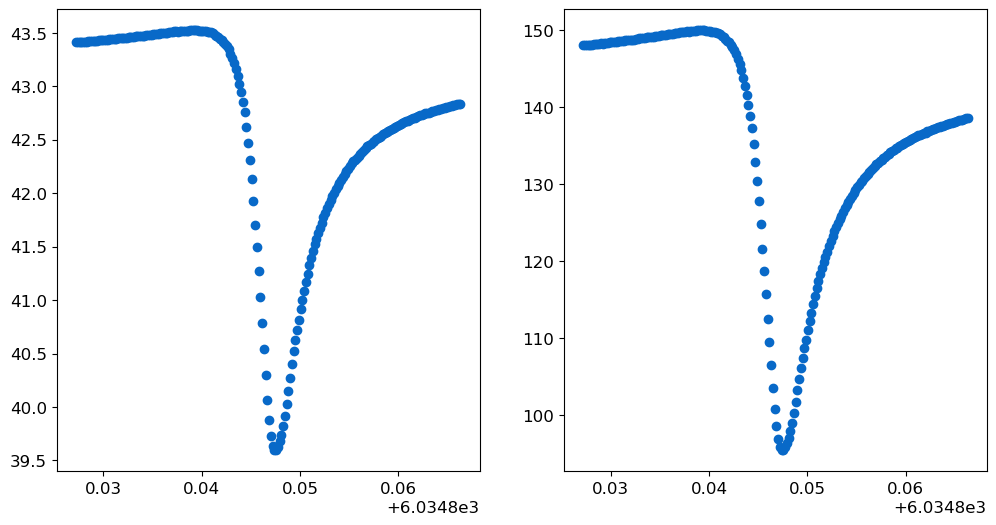

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(data['xpts'], data['amps'], 'o', label='raw data')
ax[1].plot(rspec.data['xpts'], rspec.data['amps'], 'o', label='raw data')

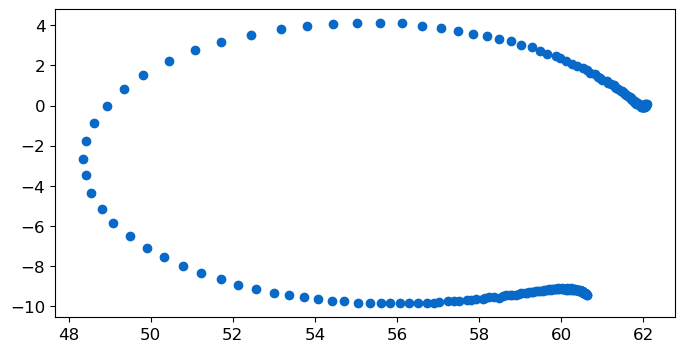

In [79]:
plt.figure()
x = data['amps']*np.cos(data['phases'])
y = data['amps']*np.sin(data['phases'])
plt.plot(x, y, 'o', label='raw data')

In [80]:
output = ResonatorFitter.fit_resonator(data, 'hi', os.getcwd(), plot=True, fix_freq=False)

attempt to get argmin of an empty sequence
>Failed to find initial guess for method DCM.  Please manually initialize a guess


UnboundLocalError: cannot access local variable 'init_guess' where it is not associated with a value

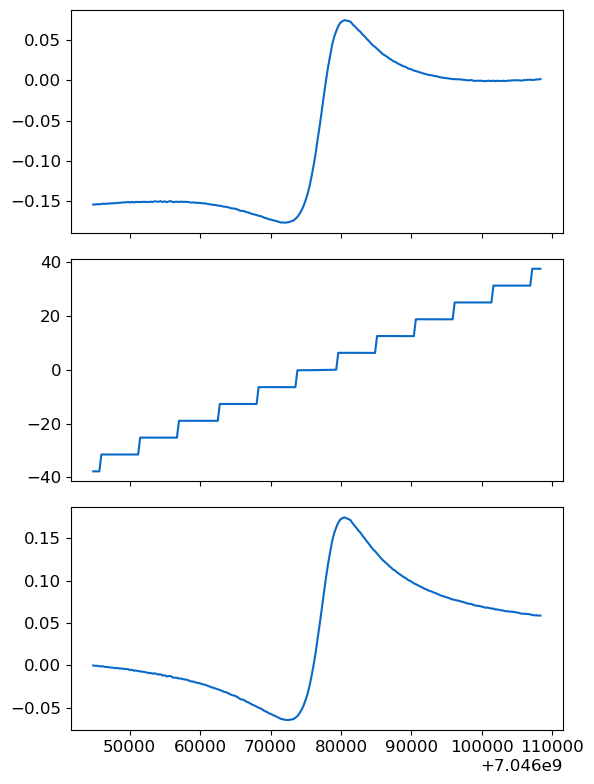

In [78]:
fig, ax = plt.subplots(3,1, figsize=(6,8), sharex=True)
ax[0].plot(rspec.data['freqs'], rspec.data['phases'])
ax[1].plot(rspec.data['freqs'], fix_phase-np.mean(fix_phase))
ax[2].plot(rspec.data['freqs'], np.unwrap(fix_phase)-np.unwrap(fix_phase)[0])
fig.tight_layout()

In [95]:
sys.path.append('C:\\_Lib\\python\\')

In [99]:
from scresonators.measurement import vna_measurement


C:\_Lib\python\qq\scresonators\fit_resonator\ana_tls.py:238: SyntaxWarning: invalid escape sequence '\;'
  ax[0].set_ylabel("$Q_c \; (10^6)$")
C:\_Lib\python\qq\scresonators\fit_resonator\ana_tls.py:246: SyntaxWarning: invalid escape sequence '\m'
  a.set_xlabel("Gap width ($\mu$m)")


  0%|          | 0/800 [00:00<?, ?it/s]

Expected time: 0.02 min


  0%|          | 0/140 [00:00<?, ?it/s]

Time elapsed: 0.03 min, expected time: 0.02 min


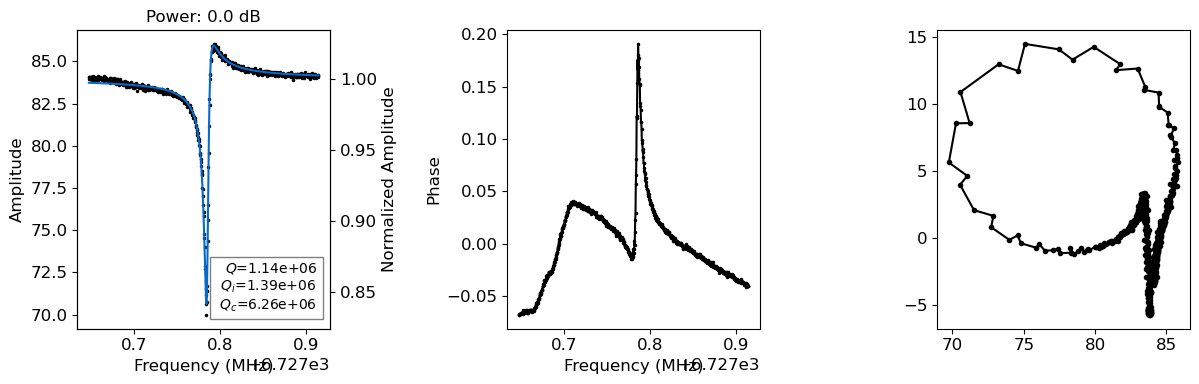

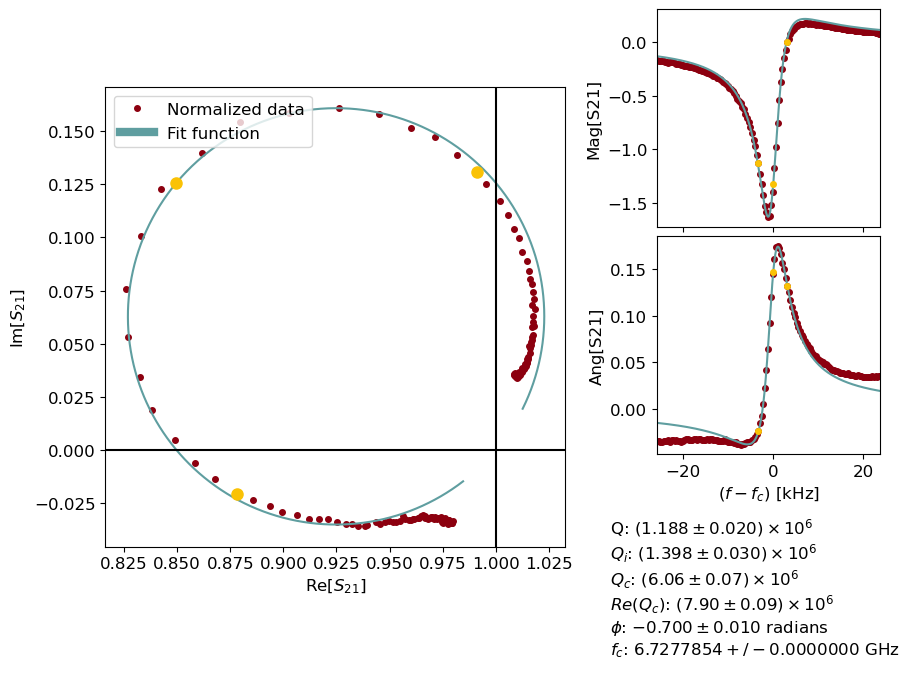

Tau proportionality: 5.33099971187045e-05
Pin -50.0, N photons: 1.25e+10, navg: 0
Next time: 0.00 min, q_adj: 0.900
Expected time: 0.02 min


  0%|          | 0/140 [00:00<?, ?it/s]

Time elapsed: 0.03 min, expected time: 0.02 min


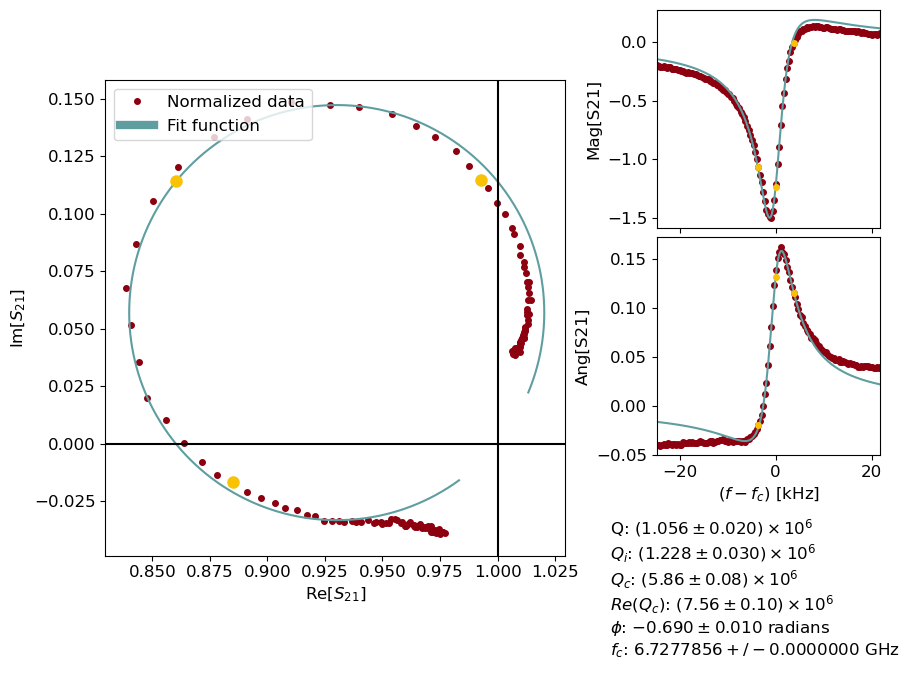

Tau proportionality: 0.00020461815204199607
Pin -55.0, N photons: 3.27e+09, navg: 0
Next time: 0.00 min, q_adj: 0.908
Expected time: 0.02 min


  0%|          | 0/140 [00:00<?, ?it/s]

Time elapsed: 0.03 min, expected time: 0.02 min


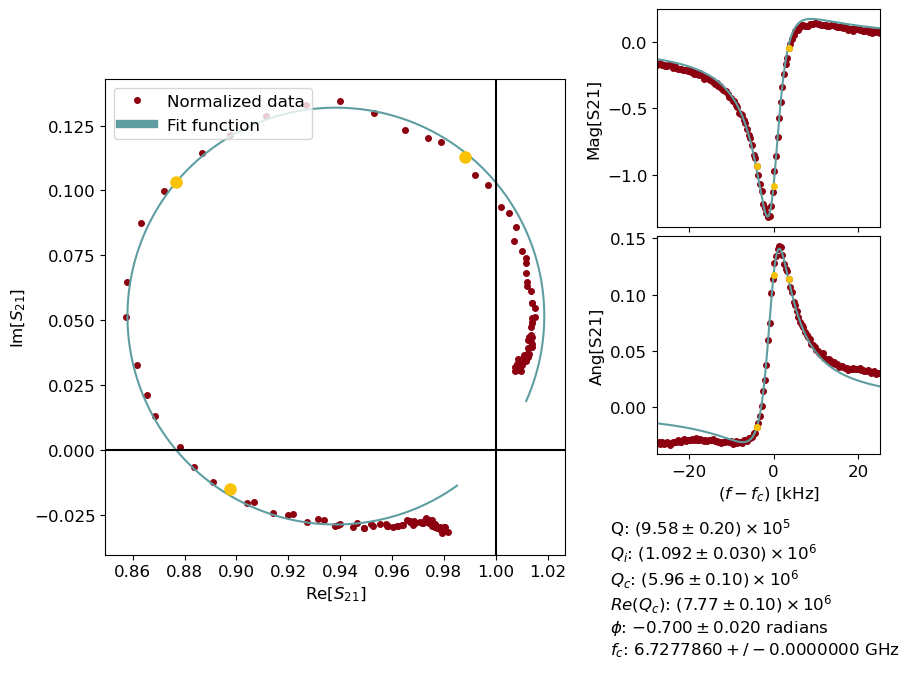

Tau proportionality: 0.0008144165544253072
Pin -60.0, N photons: 8.11e+08, navg: 1
Next time: 0.01 min, q_adj: 0.881
Expected time: 0.02 min


  0%|          | 0/140 [00:00<?, ?it/s]

Time elapsed: 0.03 min, expected time: 0.02 min


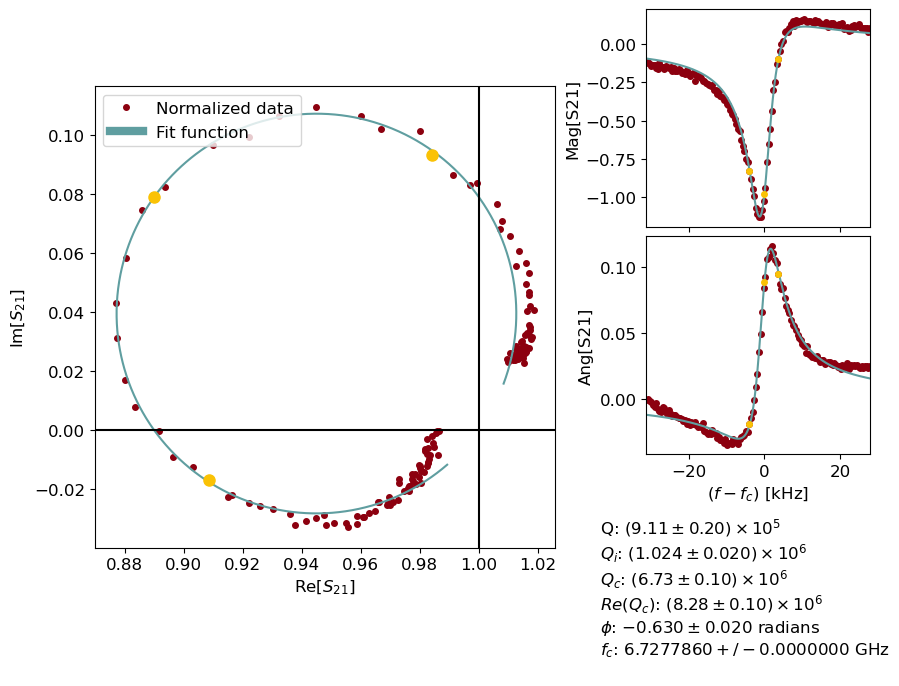

Tau proportionality: 0.003219556668822054
Pin -65.0, N photons: 2.04e+08, navg: 4
Next time: 0.05 min, q_adj: 0.888
Expected time: 0.09 min


  0%|          | 0/560 [00:00<?, ?it/s]

Time elapsed: 0.10 min, expected time: 0.09 min


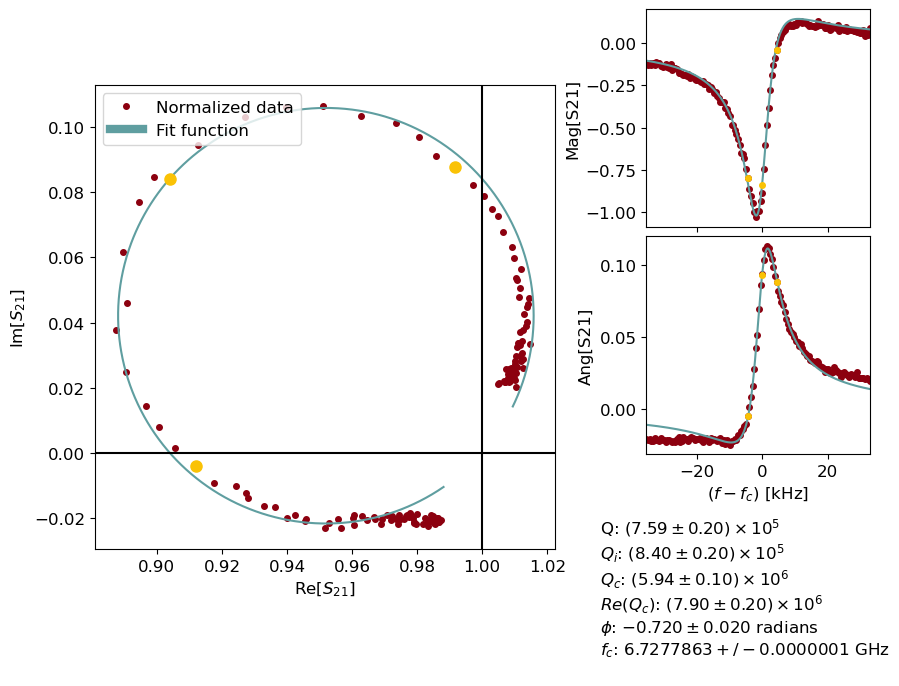

Tau proportionality: 0.01249726157726682
Pin -70.0, N photons: 5.22e+07, navg: 16
Next time: 0.19 min, q_adj: 0.898
Expected time: 0.37 min


  0%|          | 0/2240 [00:00<?, ?it/s]

Time elapsed: 0.38 min, expected time: 0.37 min


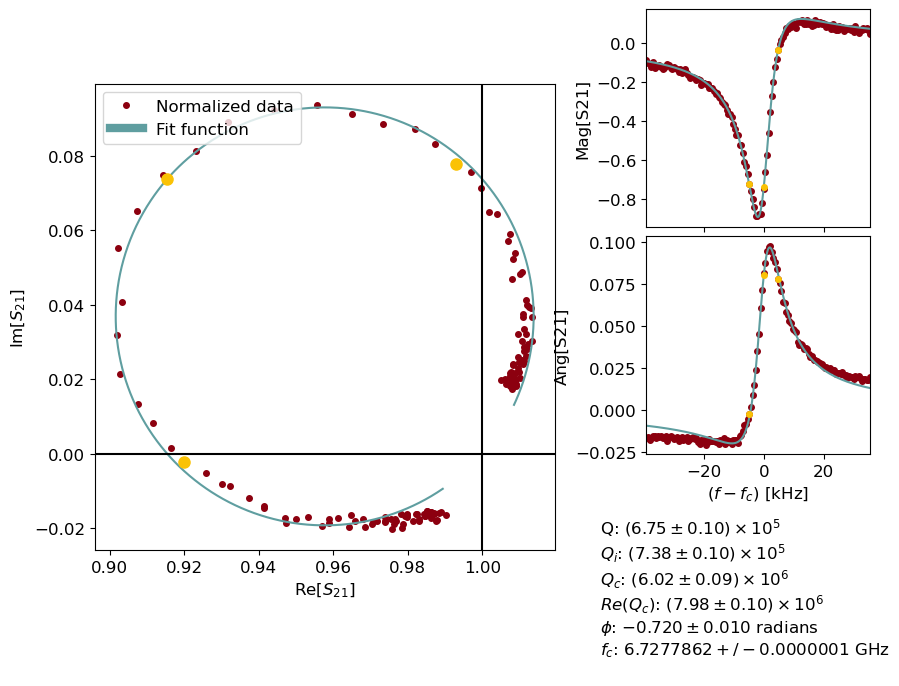

Tau proportionality: 0.05052091990531581
Pin -75.0, N photons: 1.3e+07, navg: 64
Next time: 0.75 min, q_adj: 0.888
Expected time: 0.75 min


  0%|          | 0/4480 [00:00<?, ?it/s]

Time elapsed: 0.75 min, expected time: 0.75 min


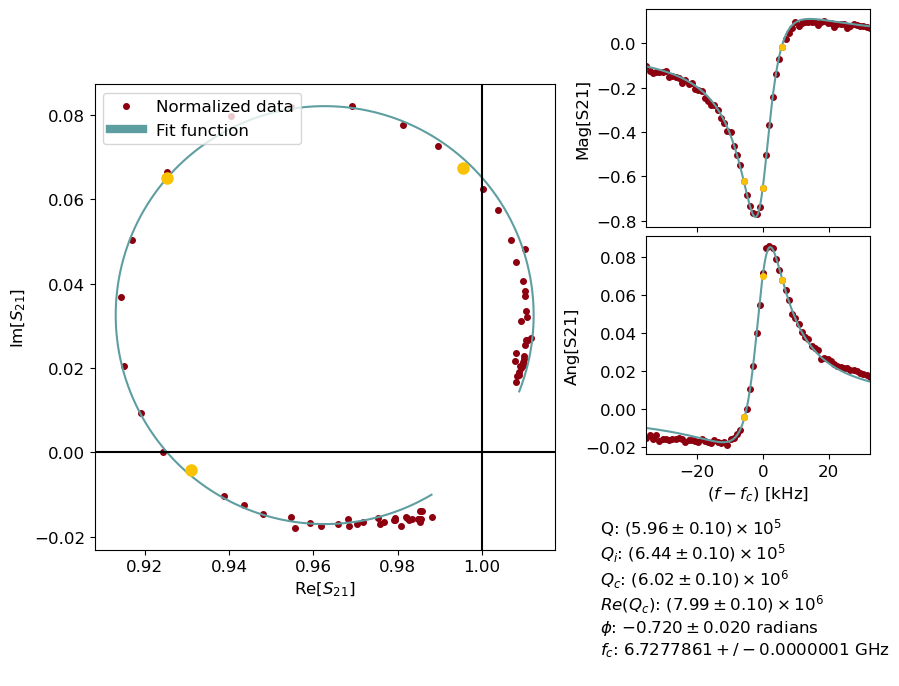

Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


Tau proportionality: 0.20689353580906486
Pin -80.0, N photons: 3.13e+06, navg: 275
Next time: 3.21 min, q_adj: 0.868
Expected time: 3.21 min


  0%|          | 0/19250 [00:00<?, ?it/s]

Time elapsed: 3.21 min, expected time: 3.21 min


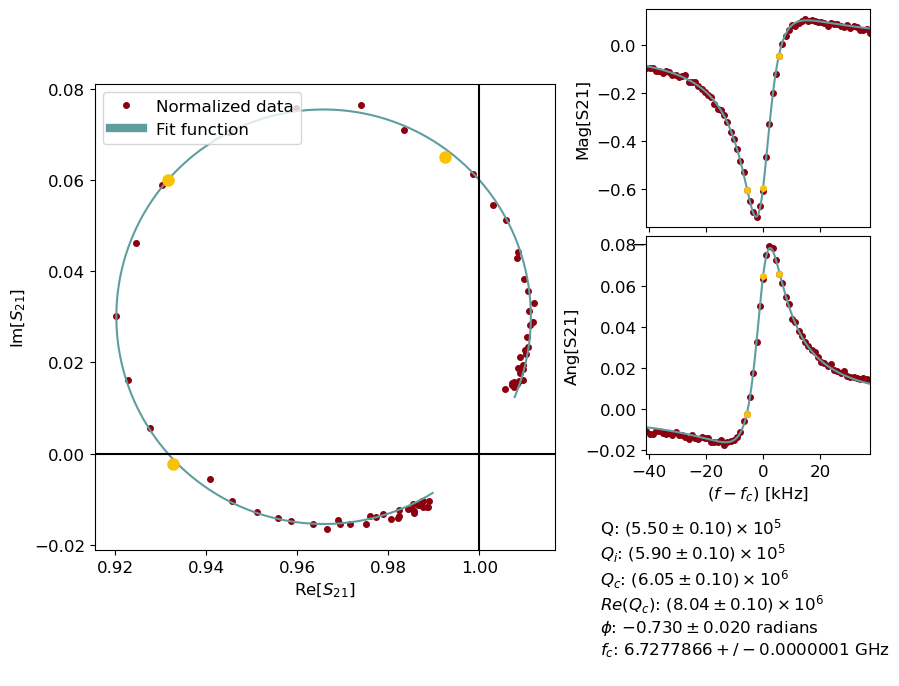

Fit parameters: [ 436402.777  4077540.6558  181926.6781       0.2996]


Tau proportionality: 0.7605936318586971
Pin -85.0, N photons: 8.49e+05, navg: 887
Next time: 10.35 min, q_adj: 0.926
Expected time: 10.35 min


  0%|          | 0/62090 [00:00<?, ?it/s]

Time elapsed: 10.36 min, expected time: 10.35 min
Qi err: 0.004864717358591467


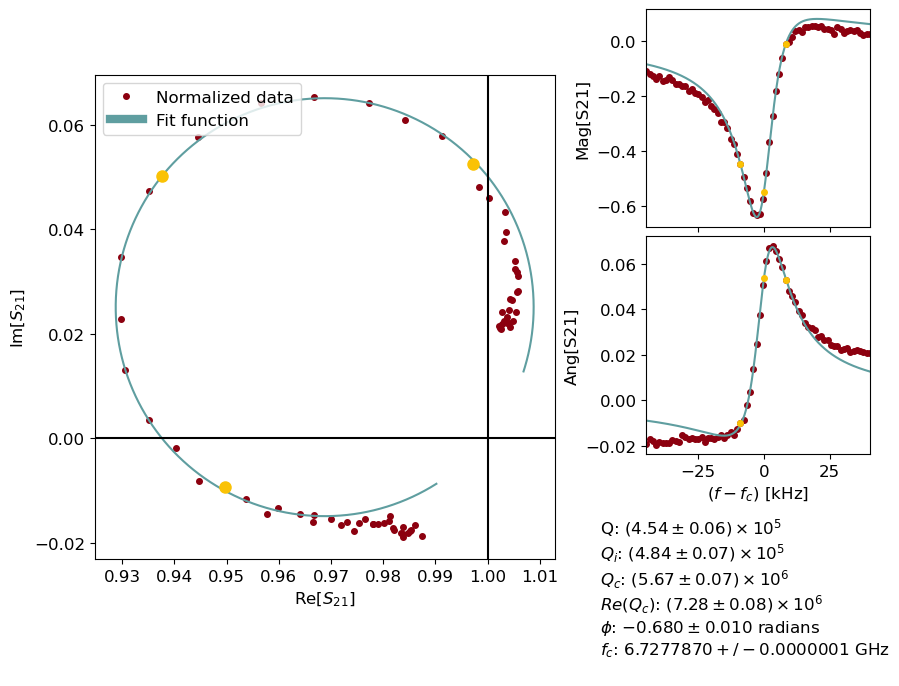

Fit parameters: [  215484.3627 12446385.3756      115.9572        0.2224]


Tau proportionality: 3.338348930060949
Pin -90.0, N photons: 1.95e+05, navg: 4544
Next time: 53.01 min, q_adj: 0.857
Expected time: 53.01 min


  0%|          | 0/318080 [00:00<?, ?it/s]

Time elapsed: 53.04 min, expected time: 53.01 min
Qi err: 0.004248854461757473


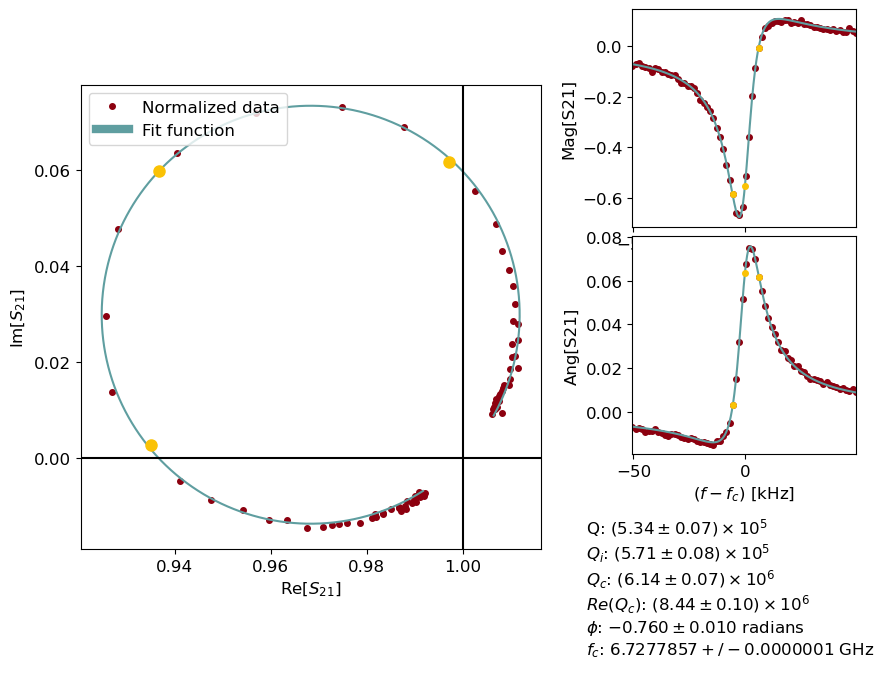

Fit parameters: [ 594328.9651 2668788.7796 1914400.1707       0.3912]


Tau proportionality: 8.284790306849876
Pin -95.0, N photons: 7.88e+04, navg: 6502
Next time: 75.86 min, q_adj: 1.129
Stopping frequency 6.72779 GHz


  0%|          | 0/800 [00:00<?, ?it/s]

Expected time: 0.02 min


  0%|          | 0/140 [00:00<?, ?it/s]

Time elapsed: 0.03 min, expected time: 0.02 min


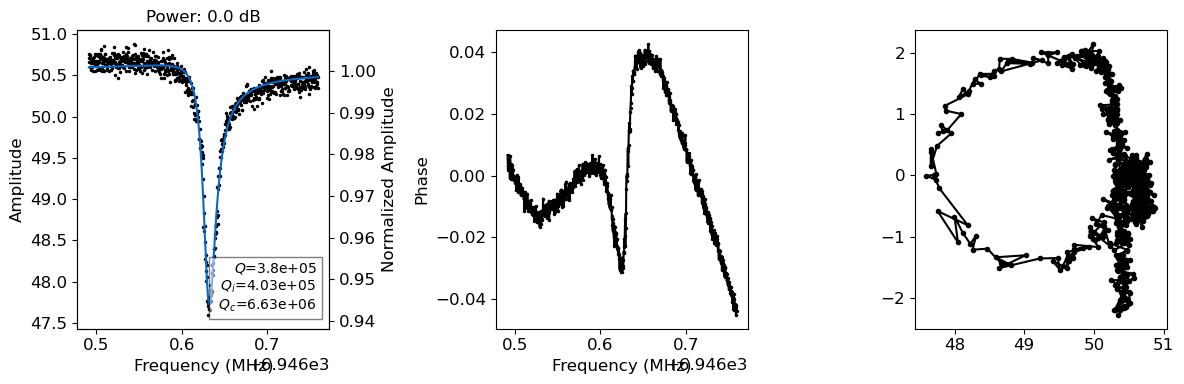

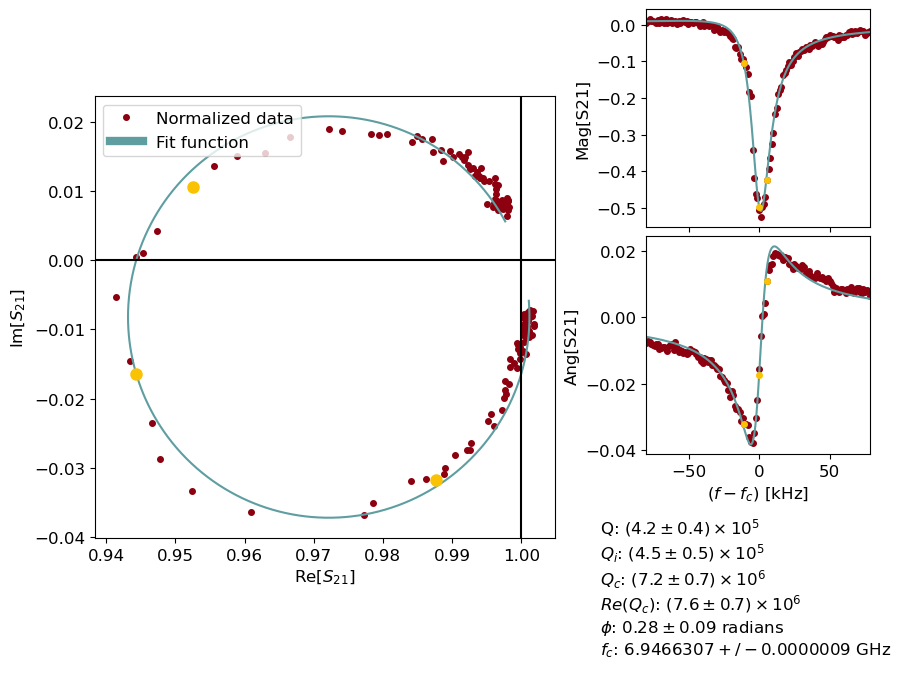

Tau proportionality: 0.0006636574732641111
Pin -50.0, N photons: 1.07e+09, navg: 1
Next time: 0.01 min, q_adj: 0.900
Expected time: 0.02 min


  0%|          | 0/140 [00:00<?, ?it/s]

Time elapsed: 0.03 min, expected time: 0.02 min


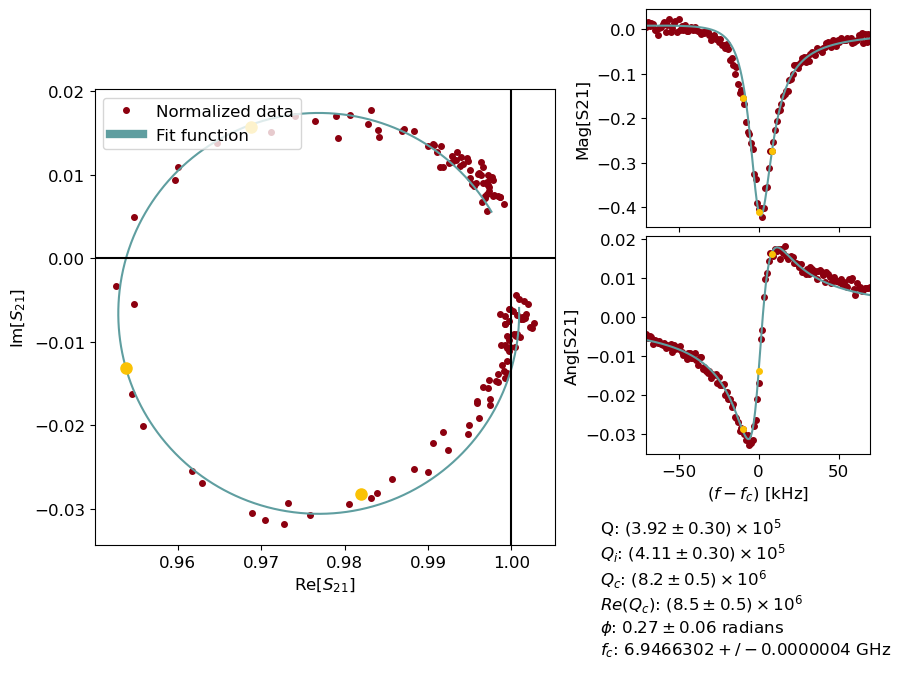

Tau proportionality: 0.003719882506504605
Pin -55.0, N photons: 2.02e+08, navg: 6
Next time: 0.07 min, q_adj: 0.795
Expected time: 0.14 min


  0%|          | 0/840 [00:00<?, ?it/s]

Time elapsed: 0.14 min, expected time: 0.14 min


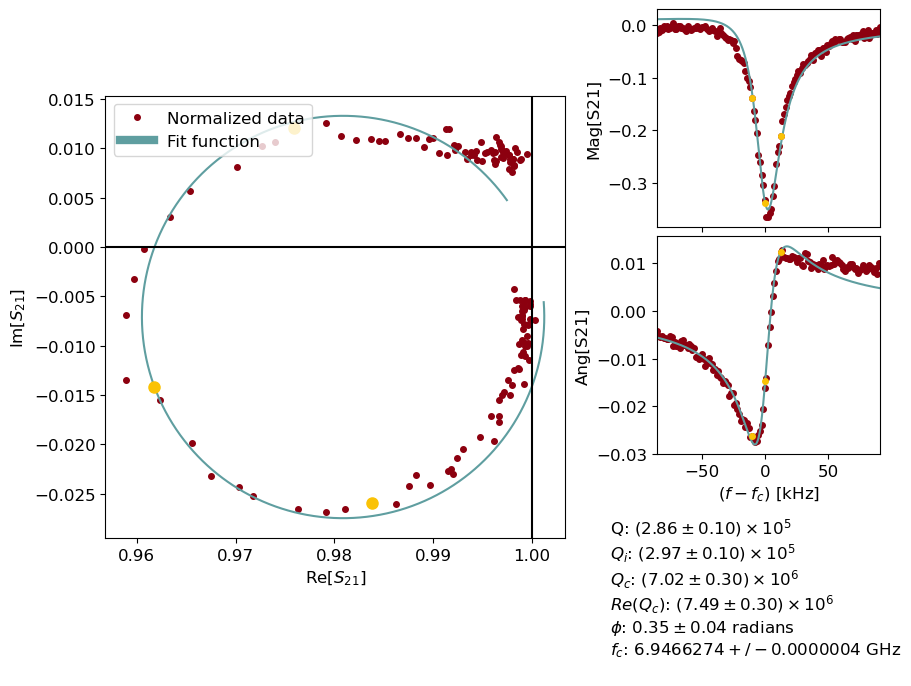

Tau proportionality: 0.01510282924522655
Pin -60.0, N photons: 5.03e+07, navg: 19
Next time: 0.22 min, q_adj: 0.891
Expected time: 0.44 min


  0%|          | 0/2660 [00:00<?, ?it/s]

Time elapsed: 0.45 min, expected time: 0.44 min


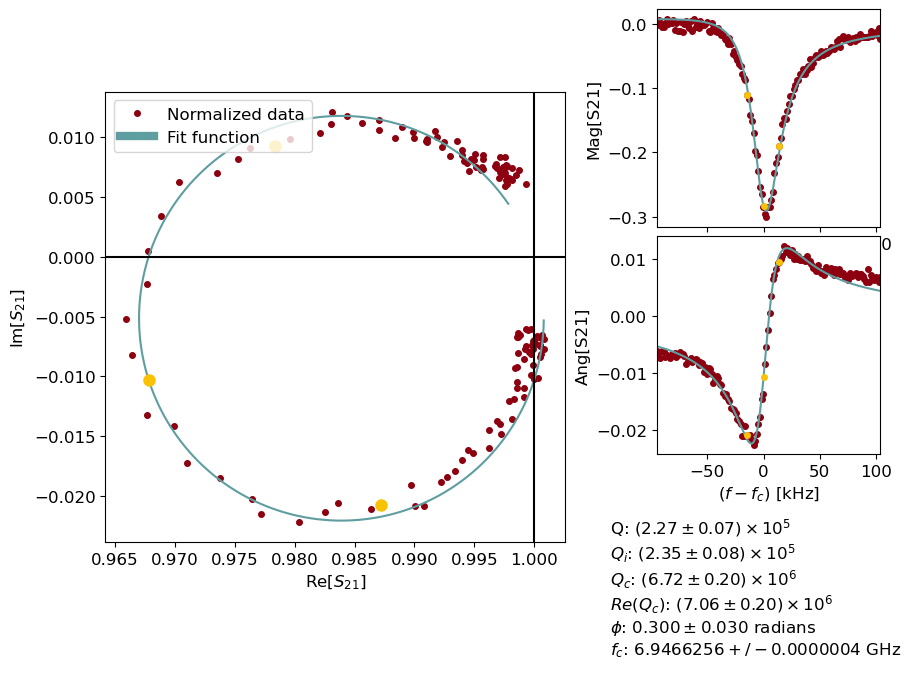

Tau proportionality: 0.06865738812305361
Pin -65.0, N photons: 1.01e+07, navg: 120
Next time: 1.40 min, q_adj: 0.758
Expected time: 2.80 min


  0%|          | 0/16800 [00:00<?, ?it/s]

Time elapsed: 2.80 min, expected time: 2.80 min


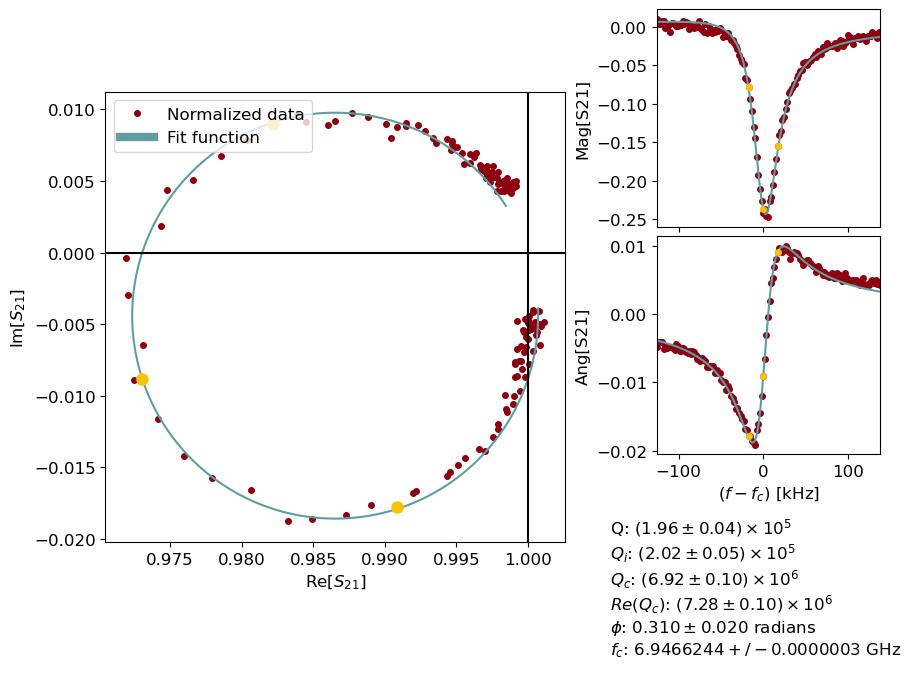

Tau proportionality: 0.299410775321728
Pin -70.0, N photons: 2.36e+06, navg: 394
Next time: 4.60 min, q_adj: 0.872
Expected time: 9.19 min


  0%|          | 0/55160 [00:00<?, ?it/s]

Time elapsed: 9.20 min, expected time: 9.19 min


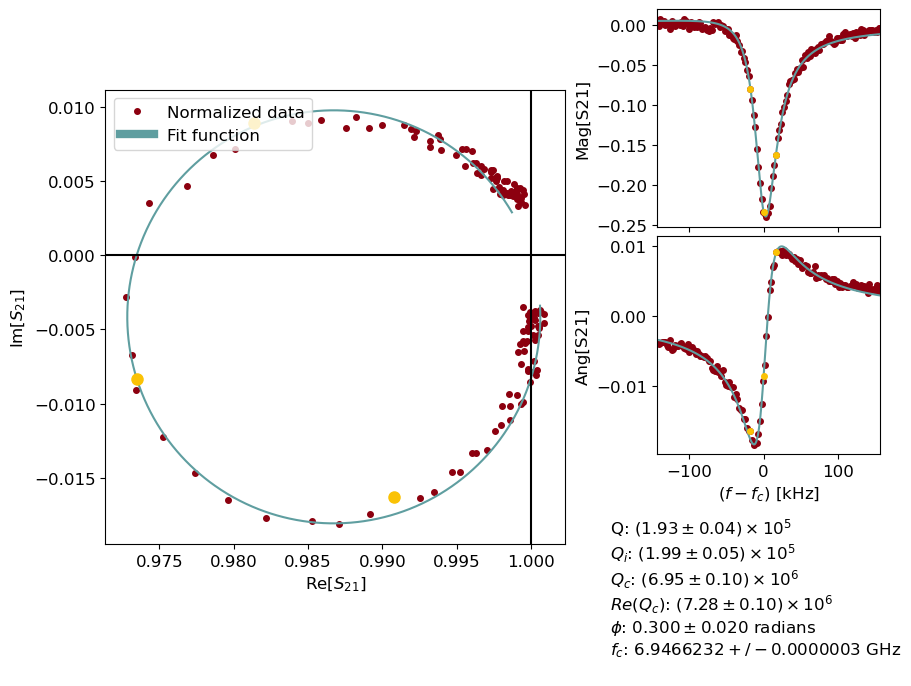

Tau proportionality: 0.9848015302759872
Pin -75.0, N photons: 7.12e+05, navg: 1043
Next time: 12.17 min, q_adj: 0.972
Expected time: 12.17 min


  0%|          | 0/73010 [00:00<?, ?it/s]

Time elapsed: 12.18 min, expected time: 12.17 min


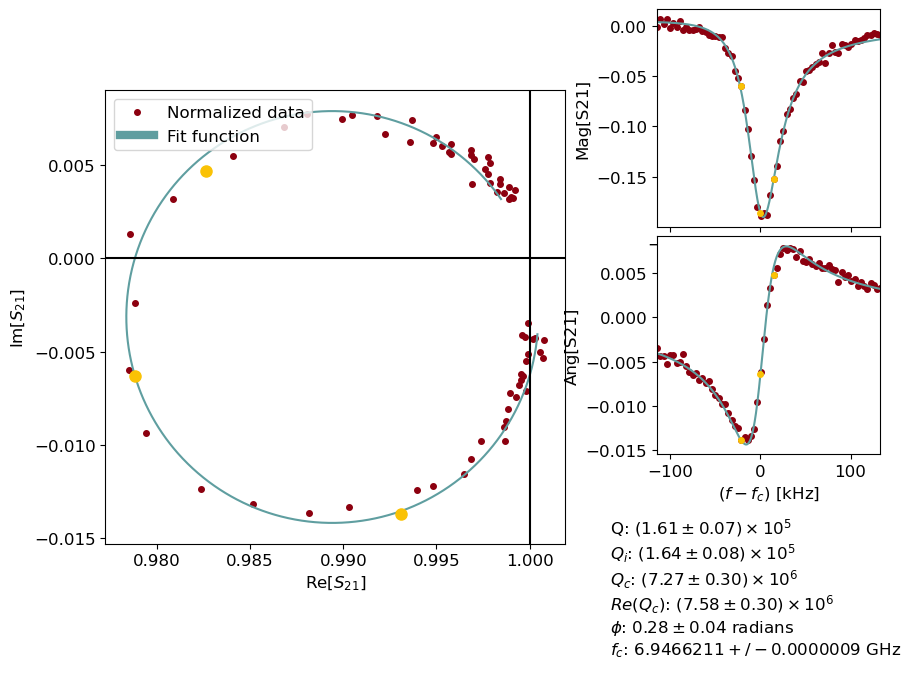

Fit parameters: [ 152097.1596 1791297.2479  823050.2895       0.3784]


Tau proportionality: 4.816803647730182
Pin -80.0, N photons: 1.51e+05, navg: 6952
Next time: 81.11 min, q_adj: 0.832
Expected time: 81.11 min


  0%|          | 0/486640 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [124]:
#6034.8476, 6374.5886,
freq_list =np.array([ 6727.7838, 6946.6281, 7046.077, 7219.7741, 7583.168,
      8077.1325])*1e6

base_path = r'G:/My Drive/Projects/Materials/Data/250503-ResSil5Ta'

if not os.path.exists(base_path):
    os.makedirs(base_path)
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'single','base_path':base_path, 'nvals':21,"pow_start":-0,"avg_corr":0.3,'npoints':23}
custom_config = {"freqs":np.array(freq_list), "att":50,'type':'rfsoc','base_path':base_path, 'nvals':21,"pow_start":0,"avg_corr":1e3,"db_corr":12,"phase_inc":cfg['device']['readout']['phase_inc'],"bandwidth":100,"npoints":70, "span_inc":7}
    # Update default config with custom values
config = vna_measurement.get_default_power_sweep_config(custom_config)

results = vna_measurement.power_sweep_rfsoc(config, cfg_dict)

In [117]:
config

{'base_path': 'G:/My Drive/Projects/Materials/Data/250503-ResSil5Ta',
 'folder': 'power_sweep_20250503_111132',
 'freqs': array([6.0348e+09, 6.3746e+09, 6.7278e+09, 6.9466e+09, 7.0461e+09,
        7.2198e+09, 7.5832e+09, 8.0771e+09]),
 'span_inc': 10,
 'kappa_start': 30000,
 'nvals': 21,
 'pow_start': 0,
 'pow_inc': -5,
 'npoints': 201,
 'npoints1': 10,
 'npoints2': 27,
 'bandwidth': 100,
 'averages': 1,
 'att': 50,
 'type': 'rfsoc',
 'freq_0': 6,
 'db_slope': 4,
 'avg_corr': 10000.0,
 'db_corr': 12,
 'phase_inc': [-1130.8379223790125]}